#Infosys Price Prediction Using Linear Regression

Collecting Infosys stock data using Twelvedata API key

In [472]:
import requests

In [473]:
api_key = 'c62690a9cb76412088a2427a2394b72f'

In [474]:
import pandas as pd

ticker = 'INFY:BSE'
interval = '1day'

api_url = f'https://api.twelvedata.com/time_series?symbol={ticker}&interval={interval}&order=ASC&outputsize=2000&apikey={api_key}'
data = requests.get(api_url).json()

data1=pd.DataFrame(data['values'])
data1

,datetime,open,high,low,close,volume
0,2013-08-29,381.87500,390.62500,381.87500,388.62500,940552
1,2013-08-30,386.37500,390.45001,379.87500,387.53751,618976
2,2013-09-02,383.25000,390.50000,383.25000,384.66876,485696
3,2013-09-03,384.25000,386.62500,377.50000,379.23126,332456
4,2013-09-04,381.25000,392.43750,381.25000,388.23749,793552
...,...,...,...,...,...,...
1995,2021-10-08,1704.00000,1731.00000,1698.19995,1723.55005,343733
1996,2021-10-11,1678.15002,1730.30005,1663.94995,1692.00000,240721
1997,2021-10-12,1684.00000,1689.00000,1662.00000,1684.80005,313692
1998,2021-10-13,1692.00000,1713.50000,1681.30005,1708.69995,130135


Importing required Libraries

In [476]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

Loading Data

In [477]:
#data = pd.read_csv("data.csv")

data1.head()

,datetime,open,high,low,close,volume
0,2013-08-29,381.87500,390.62500,381.87500,388.62500,940552
1,2013-08-30,386.37500,390.45001,379.87500,387.53751,618976
2,2013-09-02,383.25000,390.50000,383.25000,384.66876,485696
3,2013-09-03,384.25000,386.62500,377.50000,379.23126,332456
4,2013-09-04,381.25000,392.43750,381.25000,388.23749,793552


In [478]:
data1['datetime'] = pd.to_datetime(data1.datetime)

In [479]:
data1['open']=data1['open'].astype(float)
data1['high']=data1['high'].astype(float)
data1['low']=data1['low'].astype(float)
data1['close']=data1['close'].astype(float)
data1['volume']=data1['volume'].astype(float)

In [480]:
data1.shape

(2000, 6)

In [481]:
data1.head()

,datetime,open,high,low,close,volume
0,2013-08-29,381.875,390.62500,381.875,388.62500,940552.0
1,2013-08-30,386.375,390.45001,379.875,387.53751,618976.0
2,2013-09-02,383.250,390.50000,383.250,384.66876,485696.0
3,2013-09-03,384.250,386.62500,377.500,379.23126,332456.0
4,2013-09-04,381.250,392.43750,381.250,388.23749,793552.0


In [482]:
data1.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [483]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  2000 non-null   datetime64[ns]
 1   open      2000 non-null   float64       
 2   high      2000 non-null   float64       
 3   low       2000 non-null   float64       
 4   close     2000 non-null   float64       
 5   volume    2000 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 93.9 KB


In [484]:
data1.describe()

,open,high,low,close,volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,684.782878,692.006734,677.352460,684.492450,5.783009e+05
std,306.894867,309.869332,303.972876,306.958289,8.724304e+05
min,368.125000,369.375000,361.750000,365.537510,0.000000e+00
25%,491.250000,495.600010,485.437510,491.137490,2.322110e+05
50%,573.000000,580.000000,566.100005,573.500000,3.550755e+05
75%,734.550003,740.050003,728.349980,733.349980,5.911248e+05
max,1770.849980,1787.500000,1752.199950,1763.449950,1.631485e+07


In [485]:
print(len(data1))

2000


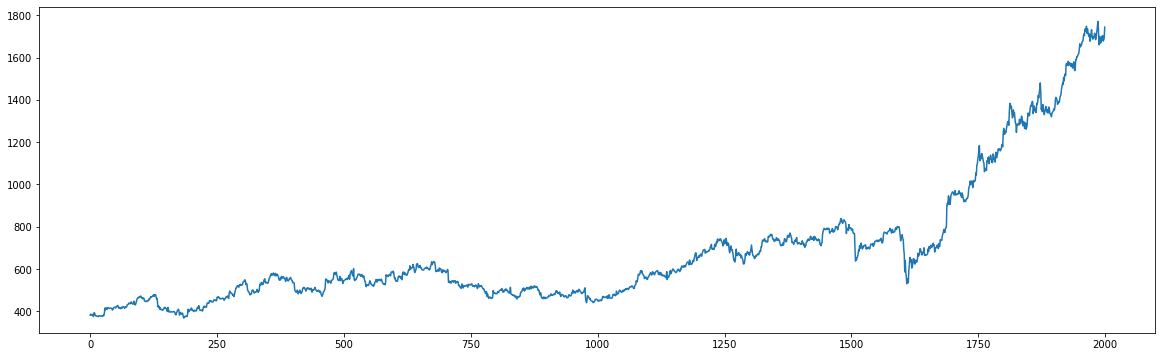

In [486]:
data1['open'].plot(figsize=(20,6))

Separate the Input and Output Columns

In [487]:
x = data1[['open', 'high', 'low', 'volume']]
y = data1['close']

Spliting the Train and Test data

In [488]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.999, random_state = 100)

In [489]:
x_train.shape

(1998, 4)

In [490]:
x_test.shape

(2, 4)

####Linear Regression Model

In [491]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LinearRegression()

Fitting the data in the Model

In [492]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [493]:
print(LR.coef_)

[-5.07653314e-01  7.34542323e-01  7.73489997e-01  1.18420438e-07]


In [494]:
print(LR.intercept_)

-0.1786765616024013


Prediction

In [495]:
predicted = LR.predict(x_test)
print(predicted)

[463.06880236 689.19665268]


In [496]:
predicted.shape

(2,)

In [497]:
dfr=pd.DataFrame(y_test,predicted)

In [498]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [499]:
print(dfr)

      Actual Price  Predicted Price
1025     463.12500       463.068802
1208     691.84998       689.196653


In [500]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [501]:
LR.score(x_test,y_test)

0.9997307354148592

In [502]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.354762481230381
Mean Squared Error: 3.5216520336255144
Root Mean Squared Error: 1.8766065207244471


In [503]:
graph=dfr.head(20)

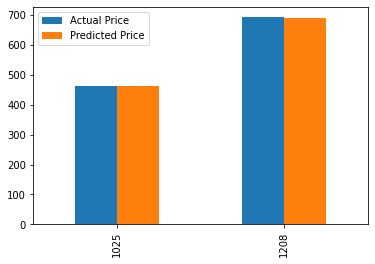

In [504]:
graph.plot(kind='bar')